In [8]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import phate
import multiscale_phate as MSphate
import pickle 
import numpy as np
PROJECT_DIR="/home/shuangni/AlzheimerProject"
# PROJECT_DIR = "C:/Users/nishu/OneDrive - Universite de Montreal/AlzheimerProejct"

In [17]:
######
# load data_raw
######
DATA_DIR_raw = PROJECT_DIR + '/data/msPHATE_data_raw.h5ad'
data_raw = sc.read_h5ad(DATA_DIR_raw)
print(data_raw)
# print(data_raw.obs.index)

AnnData object with n_obs × n_vars = 82159 × 32738
    obs: 'id', 'amyloid', 'plaq_n', 'nft', 'tangles', 'cogn_global_lv', 'gpath', 'gpath_3neocort', 'amyloid.group', 'caa_4gp', 'ceradsc', 'braaksc', 'niareagansc', 'cogdx', 'msex', 'pathology.group', 'diagnosis'
    var: 'gene_id'


In [ ]:
print(data_raw)
print(data_raw.X)
print(data_raw.obs)
print(data_raw.obs.index)
print(data_raw.to_df().head())

In [ ]:
######
# replace non-numerical values to numbers in data_raw.obs
######
# data_raw.obs["msex"].replace({"female": "1", "male": "0"}, inplace=True)
# data_raw.obs["pathology.group"].replace({"early-pathology": "-1", "late-pathology": "1", "no-pathology": "0"}, inplace=True)
# data_raw.obs["amyloid.group"].replace({"high": "1", "low": "0"}, inplace=True)
# print(data_raw.obs.head())

In [5]:
######
# load data_pp
######
DATA_DIR_pp = PROJECT_DIR + '/data/msPHATE_data_pp.h5ad'
data_pp = sc.read_h5ad(DATA_DIR_pp)
print(data_pp)
print(data_pp.to_df().head())

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'id', 'tsne1', 'tsne2', 'pre.cluster', 'celltype', 'Subcluster', 'apoe_genotype', 'braak_stage', 'cerad_score', 'age_death', 'sex', 'pmi', 'concensus_diagnosis', 'diagnosis_cerad', 'diagnosis', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
gene_symbol         FO538757.2  SAMD11     NOC2L  KLHL17  PLEKHN1  PERM1  \
barcode                                                                    
AAACGGGAGATCCCGC.1    0.000000     0.0  0.000000     0.0      0.0    0.0   
AAATGCCTCCAATGGT.1    0.788807     0.0  0.000000     0.0      0.0    0.0   
AACCATGTCAGTGCAT.1    3.491864     0.0  0.000000     0.0      0.0    0.0   
AACCATGTCTGTACGA.1    0.000000     0.0  0.809751     0.0      0.0    0.0   
AACCGCGTCCGCATAA.1    1.184048     0.0  0.000000     0.0      0.0    0.0   

gene_symbol         HES4  ISG15      AGRN  RNF223  ...      FTCD  SPATC1L  \
barcode        

In [2]:
# print(data_pp.X.todense().shape)
data_input = data_pp.to_df()
print(data_input)

NameError: name 'data_pp' is not defined

In [5]:
######
# plot_figures function
######
def plot_figures(x_axis, y_axis, hue_list, titles= None):
  
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    # plt.figure()
    sns.scatterplot(ax=axes[0,0], x = x_axis, y = y_axis, hue=hue_list[0], s = 5).set(title='Celltypes for '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[0,1], x = x_axis, y = y_axis, hue=hue_list[1], legend=False, s = 5).set(title='Subclusters for '+ titles)
   
    # plt.figure()
    sns.scatterplot(ax=axes[0,2], x = x_axis, y = y_axis, hue=hue_list[2], s = 5).set(title='diagnosis for '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[1,0], x = x_axis, y = y_axis, hue=hue_list[3], s = 5).set(title='Cerad Scorefor '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[1,1], x = x_axis, y = y_axis, hue=hue_list[4], s = 5).set(title='braak_stages for '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[1,2], x = x_axis, y = y_axis, hue=hue_list[5], s = 5).set(title='apoe_genotypes for '+ titles)

    plt.savefig(PROJECT_DIR + '/figures/'+ titles +'_all_fig.pdf')
    plt.savefig(PROJECT_DIR + '/figures/'+ titles +'_all_fig.jpg')

celltypes = data_pp.obs.celltype
Subclusters = data_pp.obs.Subcluster
cerad_scores = data_pp.obs.cerad_score
diagnosises = data_pp.obs.diagnosis
braak_stages = data_pp.obs.braak_stage
apoe_genotypes = data_pp.obs.apoe_genotype
hues = [celltypes, Subclusters, diagnosises, cerad_scores, braak_stages, apoe_genotypes]

T-SNE results of data_pp

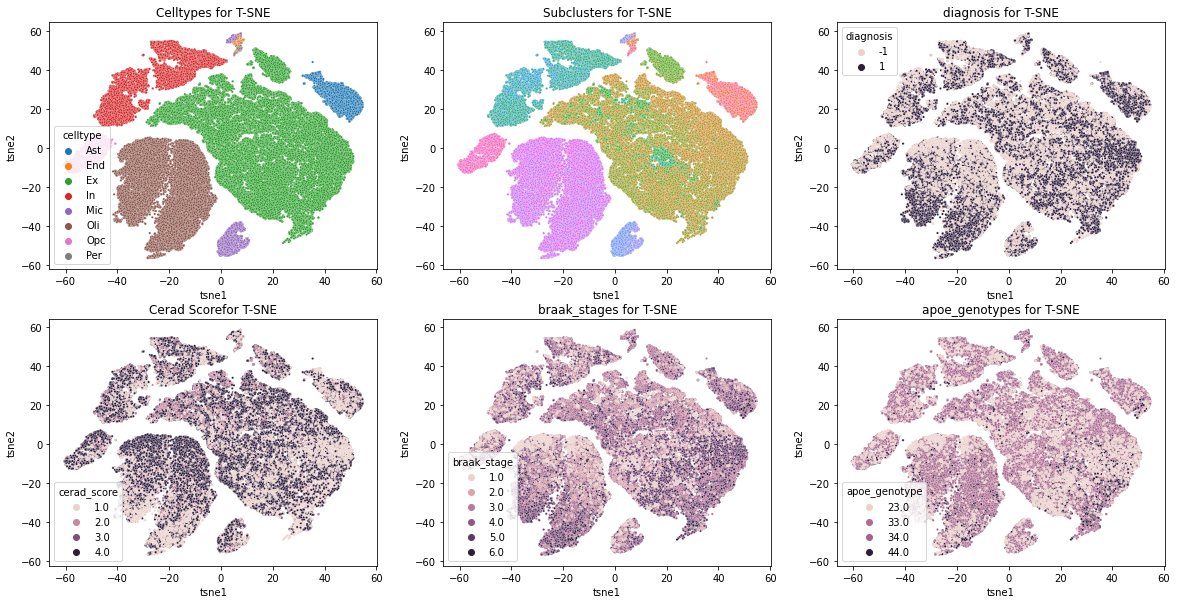

In [7]:
######
# tsne results in data_pp plots
######
tsne1 = data_pp.obs.tsne1
tsne2 = data_pp.obs.tsne2

plot_figures(x_axis=tsne1, y_axis=tsne2, hue_list = hues, titles= 'T-SNE')

PHATE for data_pp

In [8]:
######
# PHATE for data_pp
######
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp)

Calculating PHATE...
  Running PHATE on 70634 observations and 17926 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 42.14 seconds.
    Calculating KNN search...
    Calculated KNN search in 1188.47 seconds.
    Calculating affinities...
    Calculated affinities in 210.88 seconds.
  Calculated graph and diffusion operator in 1441.61 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 7.13 seconds.
    Calculating KMeans...
    Calculated KMeans in 53.94 seconds.
  Calculated landmark operator in 63.06 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 3.45 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.01 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.56 seconds.
Calculated PHATE in 1514.70 seconds.


In [12]:
dict = {'PHATE 1': Y_phate_pp[:,0], 'PHATE 2': Y_phate_pp[:,1]}
df = pd.DataFrame(dict)
df.to_csv(PROJECT_DIR+'/results/' +'PHATE_embeddings.csv')

<Figure size 432x288 with 0 Axes>

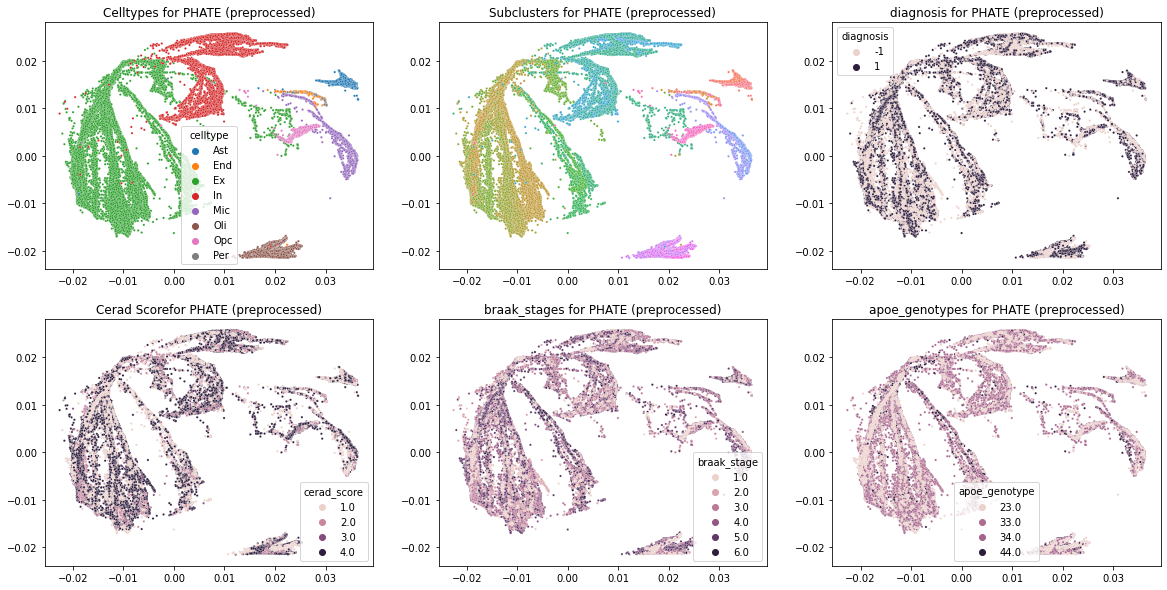

In [11]:
plt.figure()
plot_figures(x_axis=Y_phate_pp[:,0], y_axis=Y_phate_pp[:,1],hue_list = hues, titles= 'PHATE (preprocessed)')

In [9]:
######
# PHATE for data_pp
######
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_X = phate_operator.fit_transform(data_input)
plt.figure()
plot_figures(x_axis=Y_phate_X[:,0], y_axis=Y_phate_X[:,1],hue_list = hues, titles= 'PHATE (preprocessed X)')

Calculating PHATE...
  Running PHATE on 70634 observations and 17926 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


/home/shuangni/AlzheimerProject/alz_env3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


: 

: 

PHATE for data_raw without any preprcessing

In [ ]:
######
# PHATE for raw data withou any process
######
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_raw = phate_operator.fit_transform(data_raw)

[Text(0.5, 1.0, 'Celltype for PHATE')]

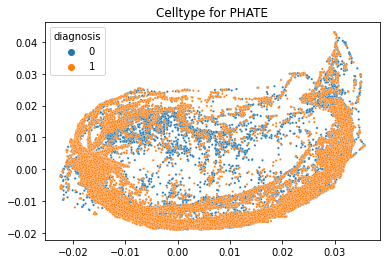

In [ ]:
diagnosis_raw = data_raw.obs.diagnosis
plt.figure()
sns.scatterplot(x = Y_phate_raw[:,0], y = Y_phate_raw[:,1], hue=diagnosis_raw, s = 5).set(title='diagnosis for PHATE')

Multiscale PHATE for data_pp without any preprcessing

In [6]:
######
# MS-PHATE for pp data to Pandas dataframe
######
mp_op =  MSphate.Multiscale_PHATE(random_state=1)
levels = mp_op.fit(data_input)

Calculating Multiscale PHATE tree...
  Calculating PCA...


: 

: 

In [13]:
mp_op2 = MSphate.Multiscale_PHATE(partitions=25000)
hp_embedding, cluster_viz, sizes_viz, tree = mp_op2.fit_transform(data_raw)

Calculating Multiscale PHATE tree...
  Calculating PCA...


: 

: 

In [ ]:
plt.figure()
ax = plt.plot(mp_op.gradient)
ax = plt.scatter(levels, mp_op.gradient[levels], c = 'r', s=100)
print(levels)

In [ ]:
plot_figures(x_axis = Y_phate_pp[:,0], y_axis = Y_phate_pp[:,1], titles= 'PHATE')

In [ ]:
# datatype not correct
data_pp_removed = data_pp.obs.drop(columns=['tsne1', 'tsne2'])
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp_removed)